In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # to install umap
# # conda install -c conda-forge umap-learn
import umap.umap_ as umap
sns.set()


In [7]:
df = pd.read_csv("../dataset/marketing_campaign.csv", sep="\t")

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df = df.dropna()
df = df.reset_index(drop=True)

In [12]:
# CAST Dt_Custumes TO DATETIME
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [13]:
df = df.drop(["Z_CostContact", "Z_Revenue"], axis=1)
df = df.drop(["ID"], axis=1)

<AxesSubplot:xlabel='Year_Birth'>

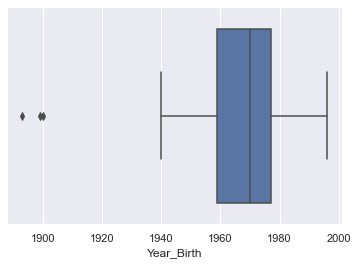

In [14]:
sns.boxplot(x=df["Year_Birth"])

<AxesSubplot:xlabel='Year_Birth'>

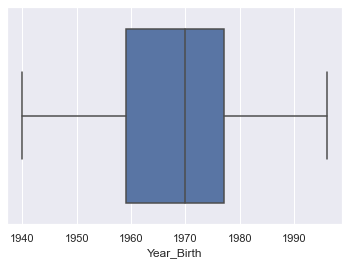

In [15]:
# DROP YEAR_BIRTH OUTLIERS
df = df.drop(df.loc[df["Year_Birth"] < 1920].index)
sns.boxplot(x=df["Year_Birth"])

In [16]:
categorical = ["Marital_Status", "Education", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response", "Complain"]

numerical = []

for col in df.columns:
    if col not in categorical:
        numerical.append(col)

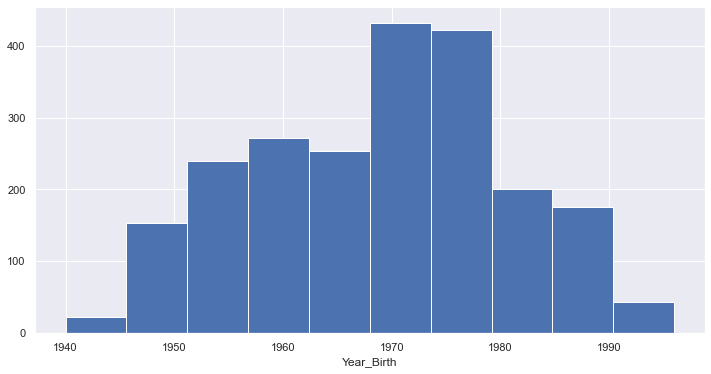

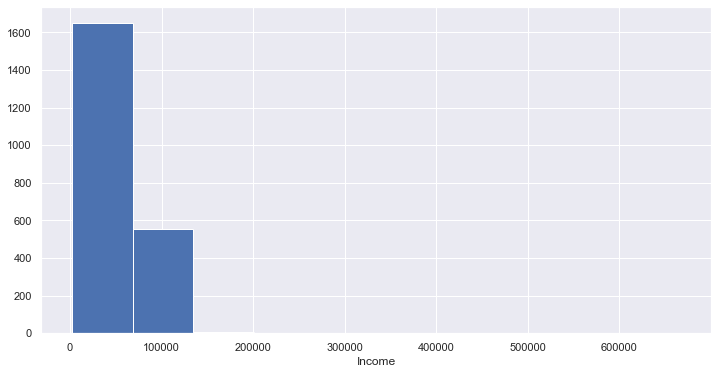

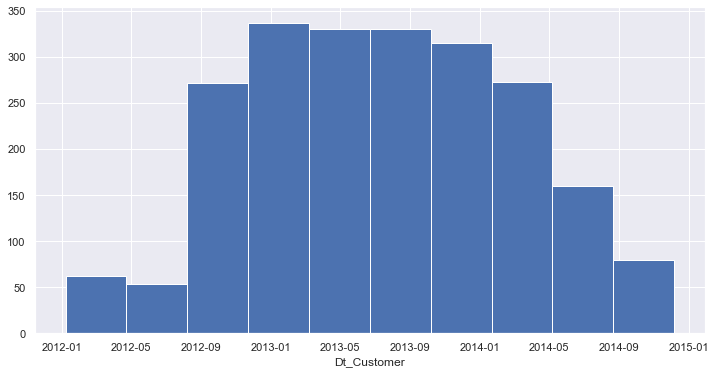

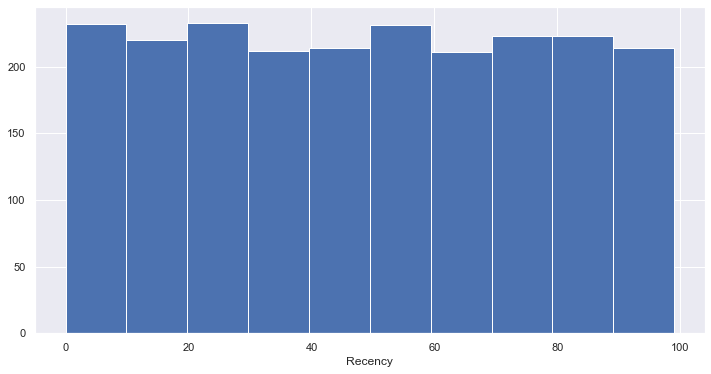

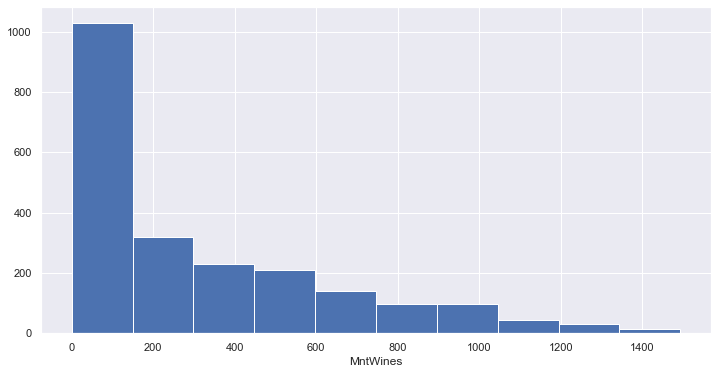

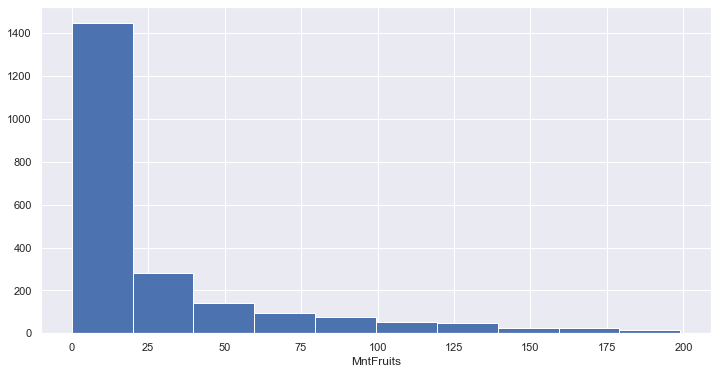

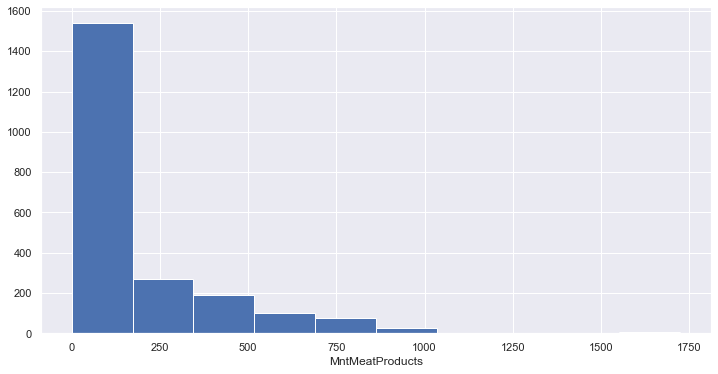

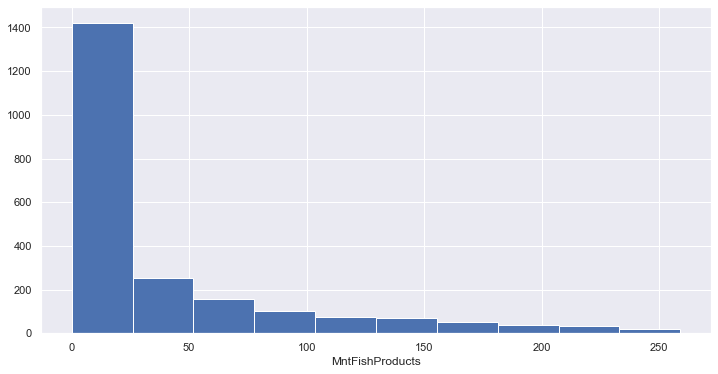

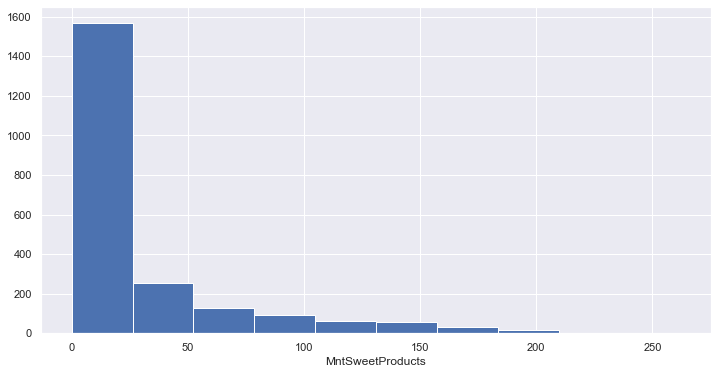

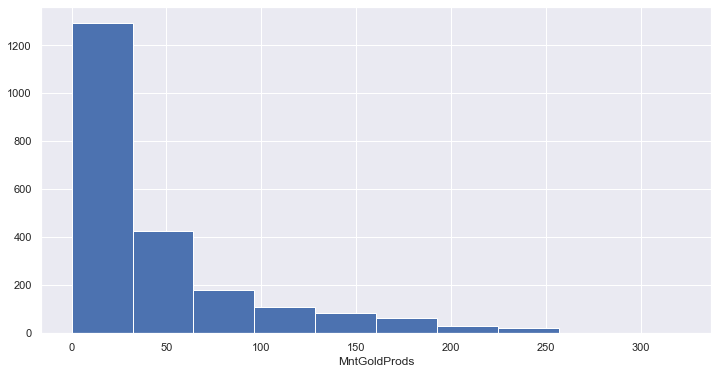

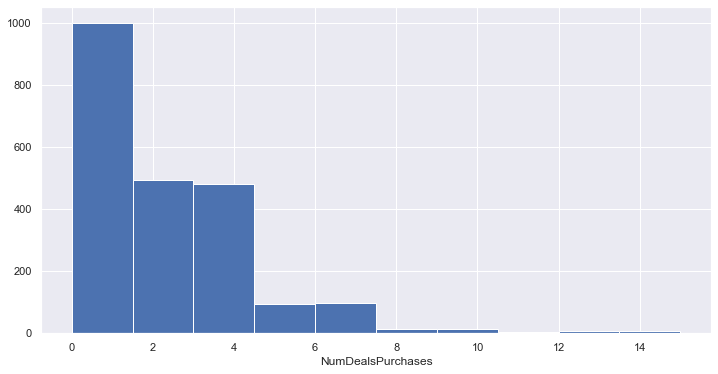

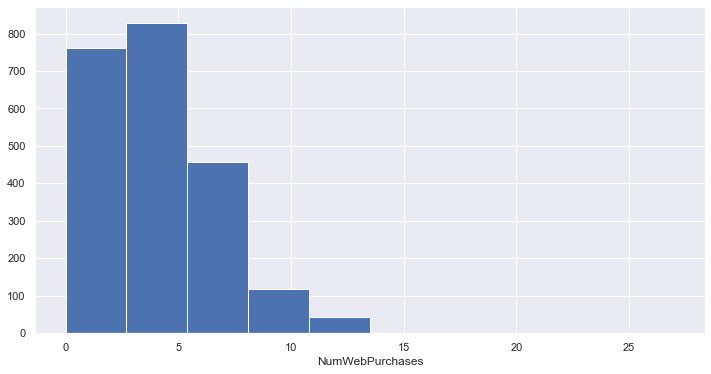

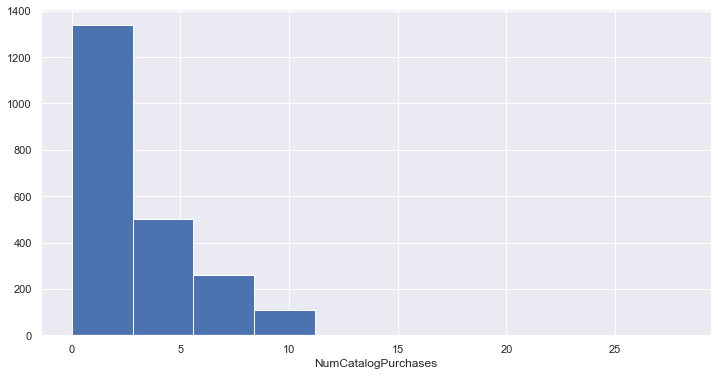

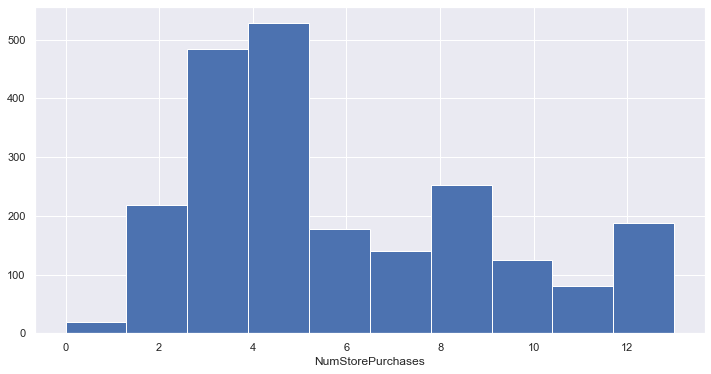

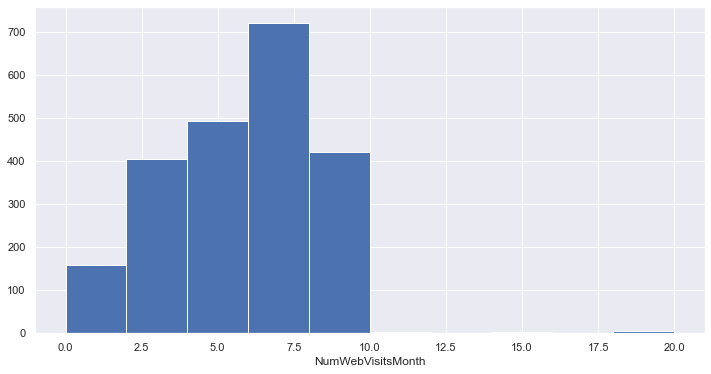

In [17]:
for col in numerical:
    fig = plt.figure(figsize=(12,6))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

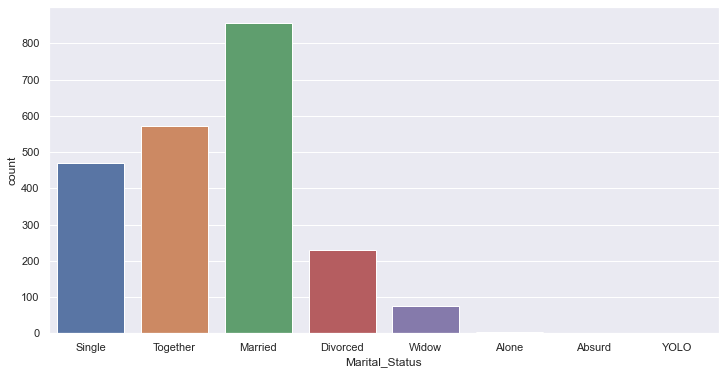

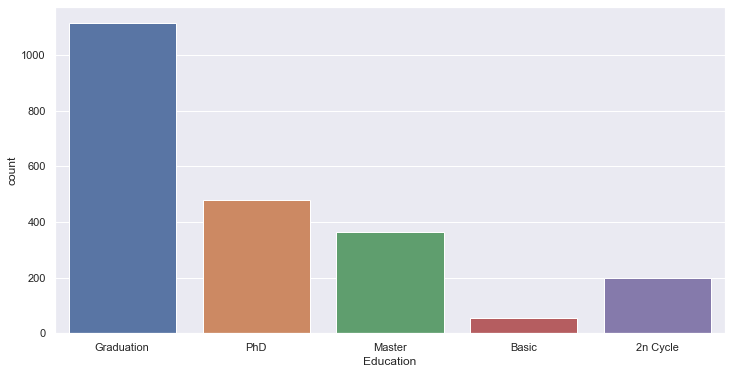

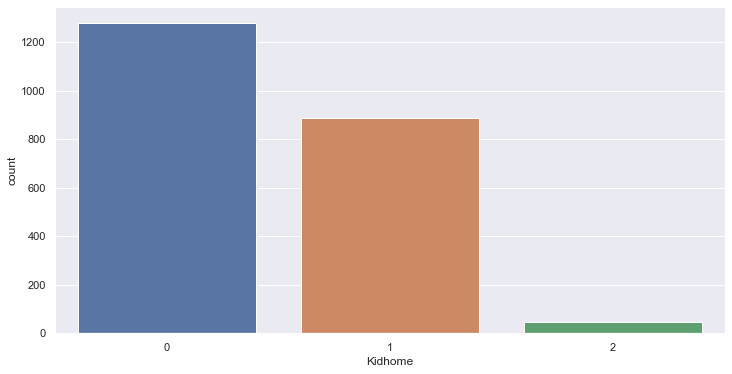

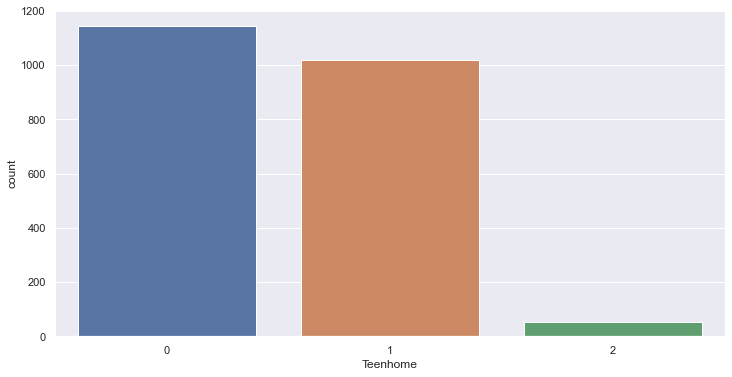

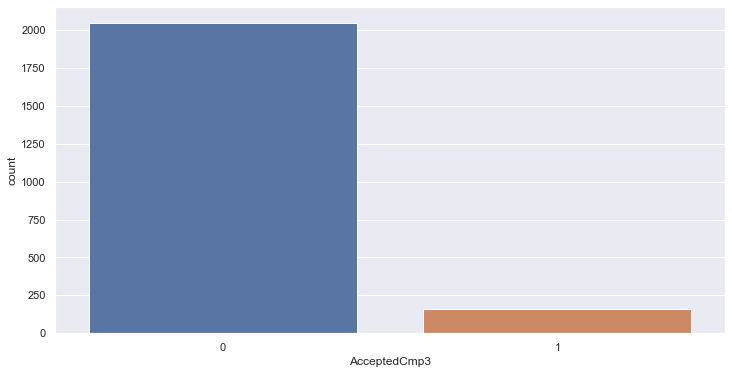

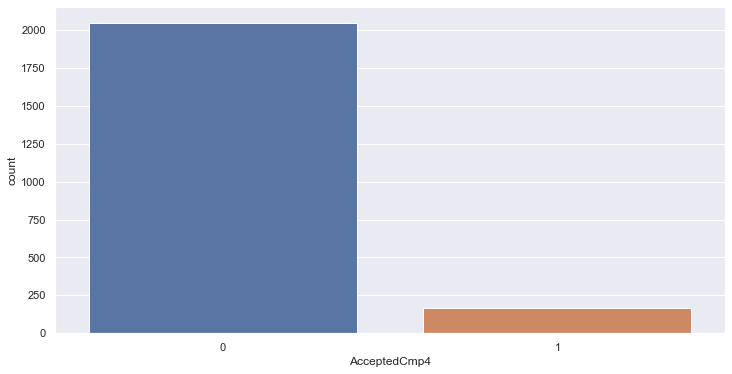

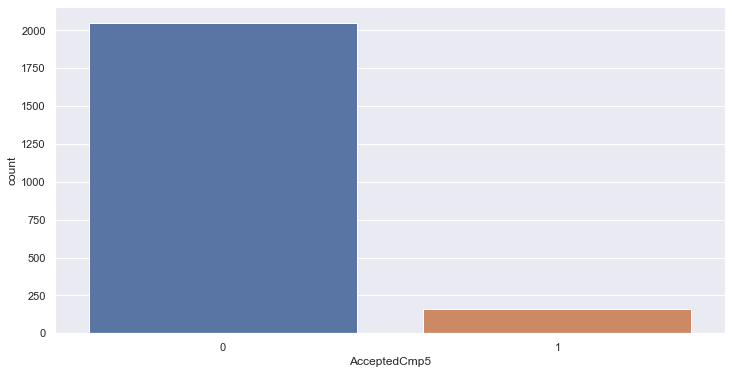

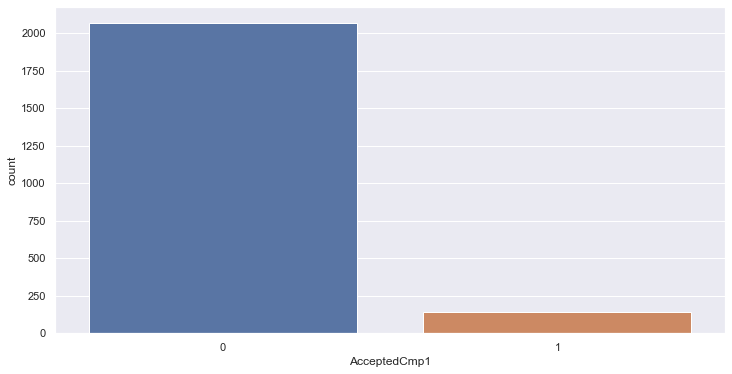

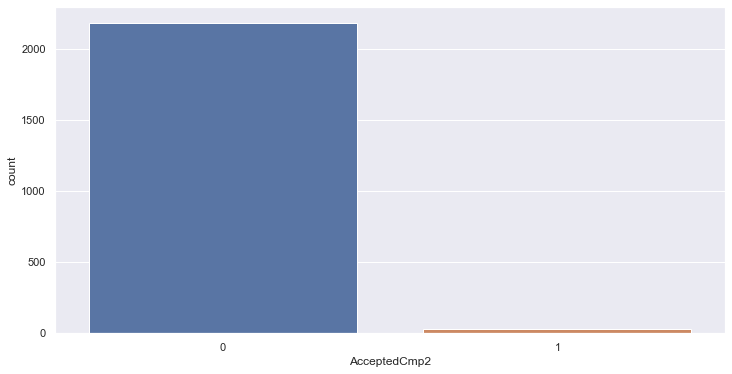

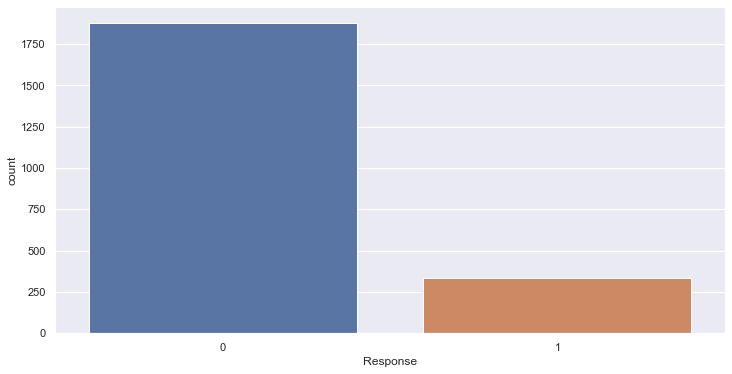

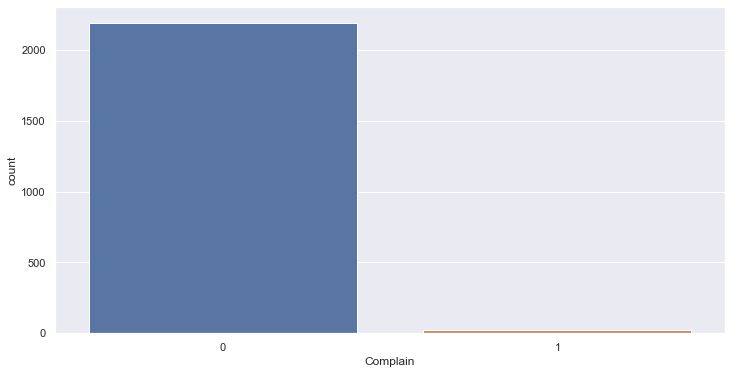

In [18]:
for col in categorical:
    fig = plt.figure(figsize=(12,6))
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.show()

In [19]:
df = df.drop(["AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp1", "Complain", "Response"], axis=1)
df_original = df.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2213 non-null   int64         
 1   Education            2213 non-null   object        
 2   Marital_Status       2213 non-null   object        
 3   Income               2213 non-null   float64       
 4   Kidhome              2213 non-null   int64         
 5   Teenhome             2213 non-null   int64         
 6   Dt_Customer          2213 non-null   datetime64[ns]
 7   Recency              2213 non-null   int64         
 8   MntWines             2213 non-null   int64         
 9   MntFruits            2213 non-null   int64         
 10  MntMeatProducts      2213 non-null   int64         
 11  MntFishProducts      2213 non-null   int64         
 12  MntSweetProducts     2213 non-null   int64         
 13  MntGoldProds         2213 non-nul

In [21]:
df = df.drop("Dt_Customer", axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2213 non-null   int64  
 1   Education            2213 non-null   object 
 2   Marital_Status       2213 non-null   object 
 3   Income               2213 non-null   float64
 4   Kidhome              2213 non-null   int64  
 5   Teenhome             2213 non-null   int64  
 6   Recency              2213 non-null   int64  
 7   MntWines             2213 non-null   int64  
 8   MntFruits            2213 non-null   int64  
 9   MntMeatProducts      2213 non-null   int64  
 10  MntFishProducts      2213 non-null   int64  
 11  MntSweetProducts     2213 non-null   int64  
 12  MntGoldProds         2213 non-null   int64  
 13  NumDealsPurchases    2213 non-null   int64  
 14  NumWebPurchases      2213 non-null   int64  
 15  NumCatalogPurchases  2213 non-null   i

In [28]:
df.loc[df["Education"] == "Basic", "Education"] = 0
df.loc[df["Education"] == "2n Cycle", "Education"] = 1
df.loc[df["Education"] == "Graduation", "Education"] = 2
df.loc[df["Education"] == "PhD", "Education"] = 3
df.loc[df["Education"] == "Master", "Education"] = 3

In [29]:
df.loc[df["Marital_Status"] == "Married", "Marital_Status"] = 0
df.loc[df["Marital_Status"] == "Together", "Marital_Status"] = 1
df.loc[df["Marital_Status"] == "Single", "Marital_Status"] = 2
df.loc[df["Marital_Status"] == "Divorced", "Marital_Status"] = 3
df.loc[df["Marital_Status"] == "Widow", "Marital_Status"] = 4
df.loc[df["Marital_Status"] == "Absurd", "Marital_Status"] = 5
df.loc[df["Marital_Status"] == "YOLO", "Marital_Status"] = 6
df.loc[df["Marital_Status"] == "Alone", "Marital_Status"] = 7

In [30]:
std = StandardScaler()
std.fit(df)

StandardScaler()

In [31]:
df_std = pd.DataFrame(std.transform(df), columns=df.columns)

In [32]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_std)


In [33]:
embedding.shape

(2213, 2)

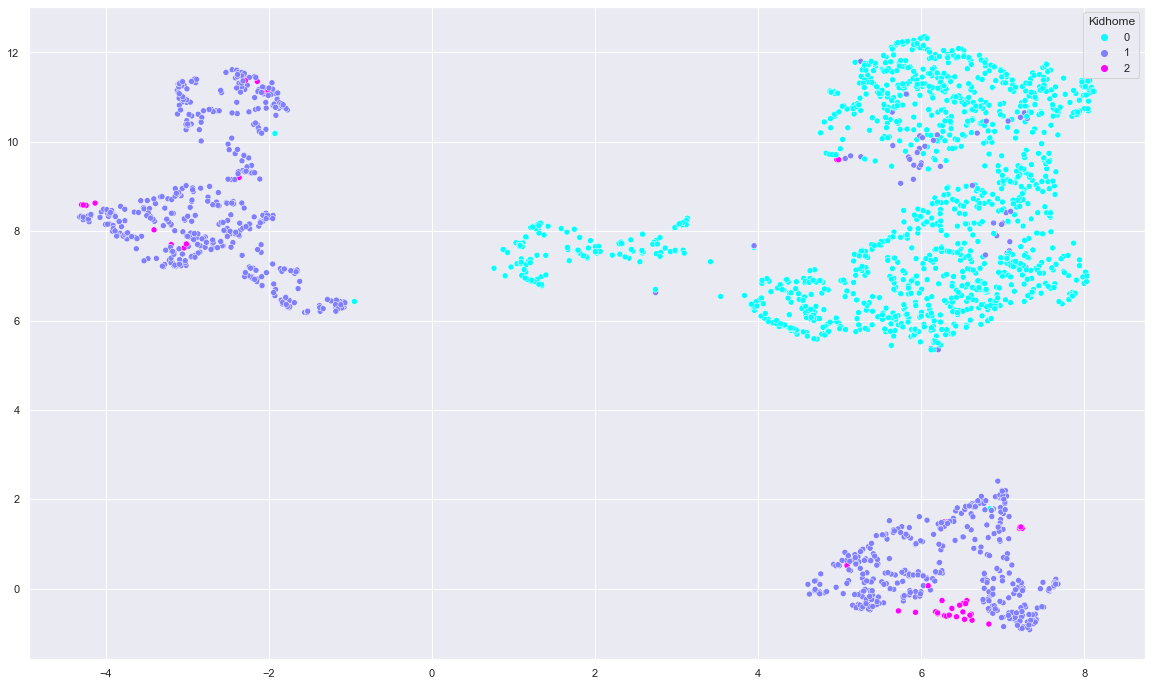

In [35]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df["Kidhome"], palette='cool')
plt.show()

In [59]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

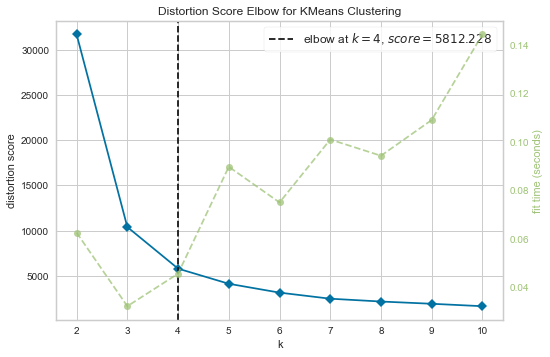

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
elbow_view = KElbowVisualizer(KMeans(), k=10)
elbow_view.fit(embedding)
elbow_view.show()

In [42]:
kmean = KMeans(n_clusters=4)

In [54]:
kmean.fit(embedding)

KMeans(n_clusters=4)

In [55]:
df["Clusters"] = kmean.predict(embedding)

In [56]:
kmean.labels_

array([1, 0, 1, ..., 1, 3, 0], dtype=int32)

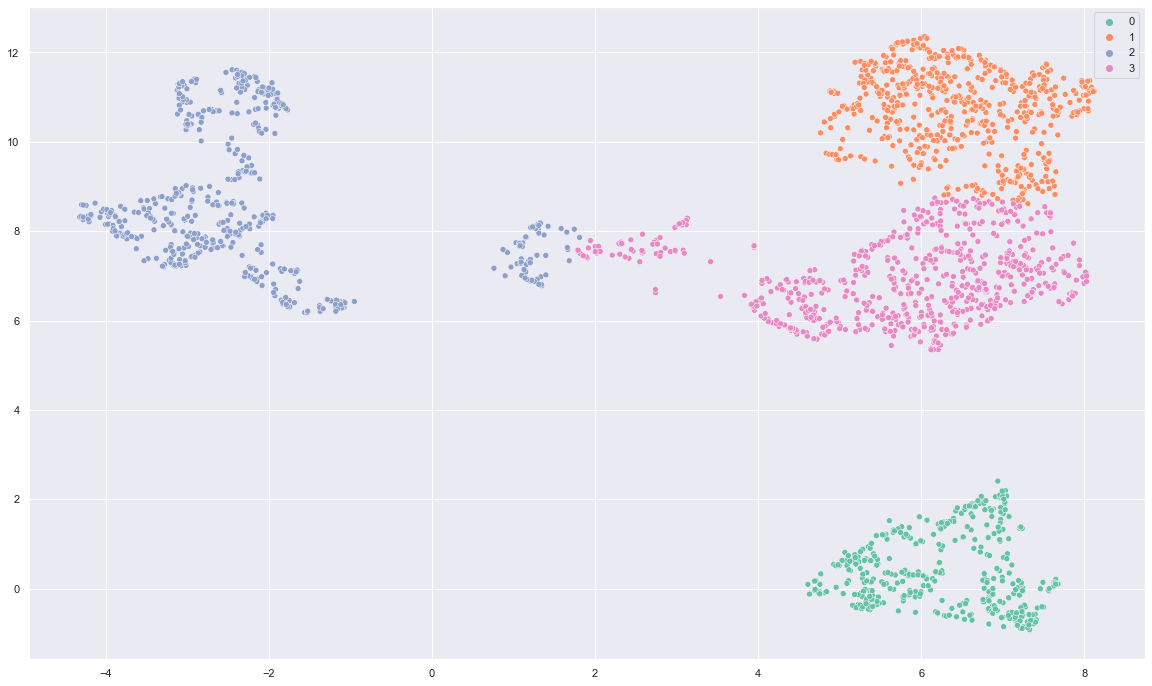

In [57]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=kmean.labels_, palette='Set2')
plt.show()

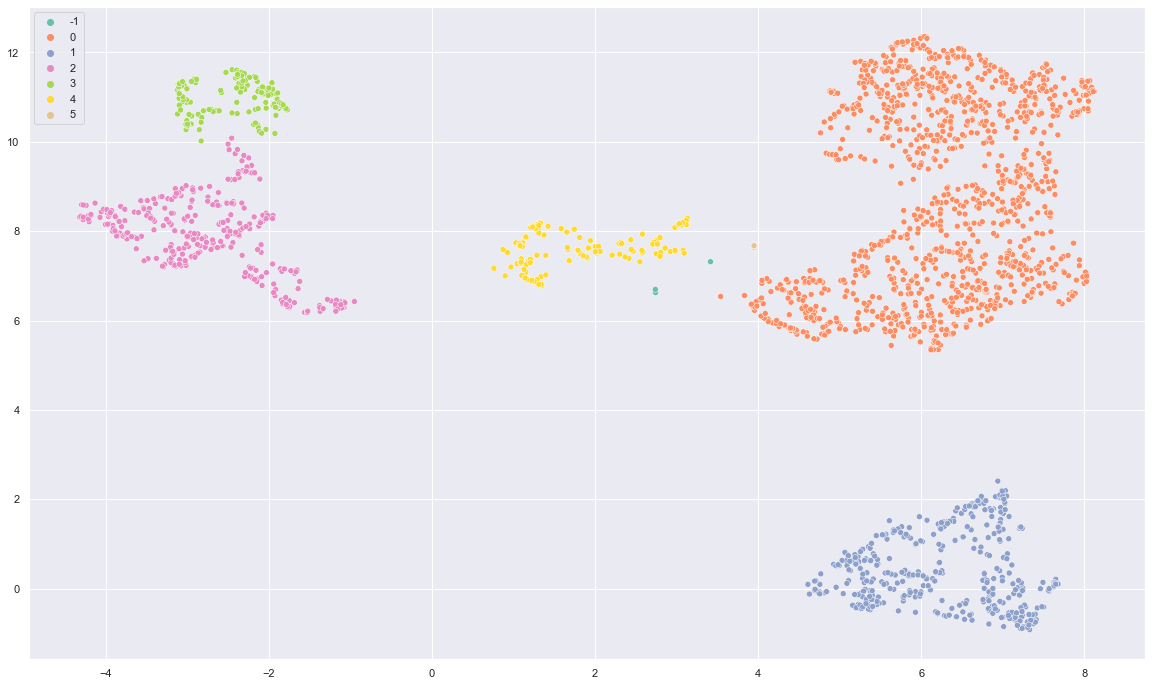

In [58]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.32, min_samples=4)

dbscan.fit(embedding)

plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette='Set2')
plt.show()